## Le code de chargement du fichier.

In [49]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os
import cv2

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import files
BLURRY_DATASET_PATH = "dataset/Livrable1/Blurry"
NOISY_DATASET_PATH = "dataset/Livrable1/Noisy"

blurry_files = []

for file in os.listdir(BLURRY_DATASET_PATH):
    blurry_files.append(os.path.join(BLURRY_DATASET_PATH, file));
    
noisy_files = []

for file in os.listdir(NOISY_DATASET_PATH):
    noisy_files.append(os.path.join(NOISY_DATASET_PATH, file))
    
# Private functions
def print_image(im):
    plt.figure(figsize=(18, 6))
    plt.axis('off')
    plt.imshow(im)

    plt.show()

def paths_to_images(paths):
    
    images = []
    
    for file in paths:
        images.append(imageio.imread(file))
        
    return images

## Le code du débruitage sur un sous-ensemble d’images bruitées.

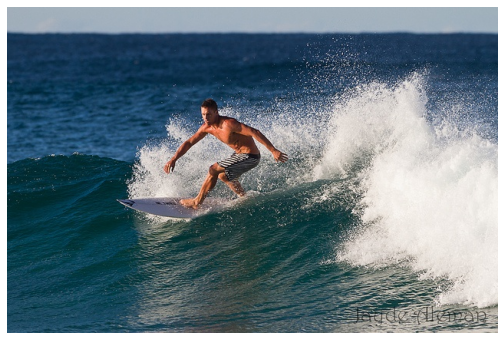

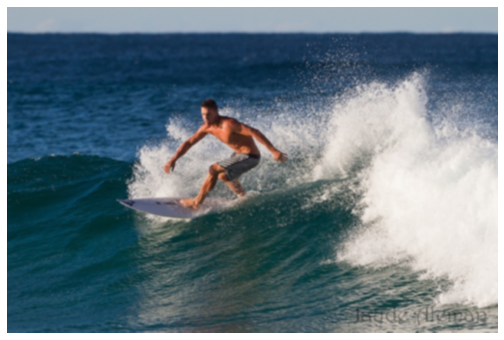

In [56]:
import imageio

def denoise_image(img):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(img, -1, kernel)

def denoise_image_gauss(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# IN image path (string[]) OUT blurred images (imageio[])
def denoise_all(images):
    
    denoised_images = []
    
    for image in images:
        denoised_img = denoise_image_gauss(image)
        denoised_images.append(denoised_img)
        
    return denoised_images

# Read original images
images_to_denoise = paths_to_images(noisy_files)

# Denoise images
denoised_images = denoise_all(images_to_denoise)

# Print first image in list (before / after)
print_image(images_to_denoise[0])
print_image(denoised_images[0])


### Function denoise_image
This function takes a single image (imageio format) as an input denoises it using cv2.Filter2D with a predefined kernel and returns the result (imageio format).

### Function denoise_image_gauss
This function takes a single image (imageio format) as an input denoises it using cv2.GaussianBlur with a predefined kernel and returns the result (imageio format).

### Function denoise_all
This function takes a list of images (imageio format), applies one of the above denoise functions to each image, returns a list of the denoised images (imageio format).

## Le code de l’affutage sur un sous-ensembles d’images floutées.

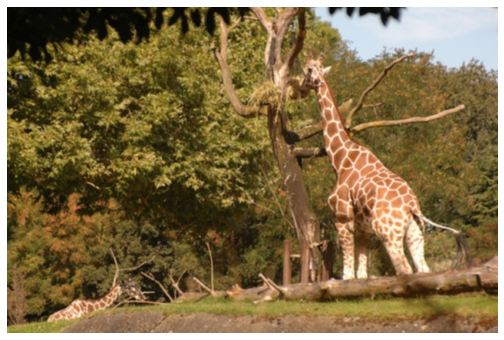

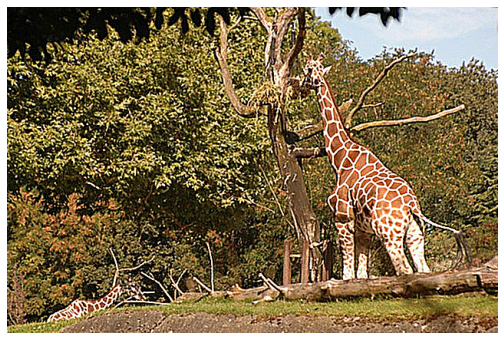

In [68]:
def sharpen_image(img):
    kernel = np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])
    return cv2.filter2D(img, -1, kernel)

def sharpen_all(images):
    
    sharpened_images = []
    
    for image in images:
        sharpened_img = sharpen_image(image)
        sharpened_images.append(sharpened_img)
        
    return sharpened_images

# Read original images
images_to_sharpen = paths_to_images(blurry_files)

# Sharpen images
sharpened_images = sharpen_all(images_to_sharpen)

# Print first image in list (before / after)
print_image(images_to_sharpen[0])
print_image(sharpened_images[0])

### Function sharpen_image
This function takes an image (imageio format) as an input, applies cv.filter2D with a defined kernel to it and returns the result (imageio format).

### Function sharpen_all
This function takes a list of images, applies the previous sharpening function to each of the list entries and returns a new list containing the sharpened images (imageio format).

## Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.

### Bruitage d'images

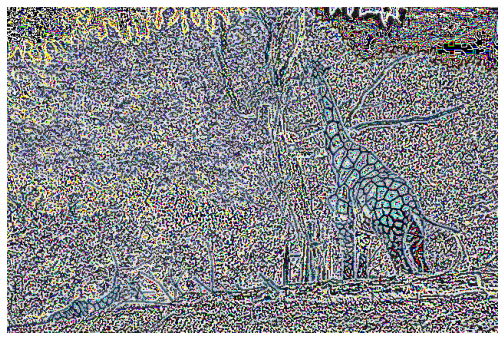

In [70]:
noise_in_image = sharpened_images[0] - images_to_sharpen[0]
print_image(noise_in_image)

### Affutage d'images

### Explication des compromis

In [ ]:
#code commenté